## Flujo de trabajo de un proyecto de Machine Learning

# Preprocesamiento de los datos


_En Machine Learning, hay una regla de 80/20. Cada data scientist suele dedicar un 80% de tiempo al preprocesamiento de datos y un 20% a realizar el análisis_

Los problemas más comunes a resolver en el preprocesamiento de datos son:
1. Valores nulos
2. Valores atípicos
3. Distintos órdenes de magnitud
4. Selección de variables

## 1. Valores nulos

### Tipos de valores nulos

Los datos faltantes se clasifican en tres categorías usando una terminología que puede confundir pero que está relacionada con la manera en que se aconseja o se puede enfrentar su ausencia.

1. **Missing completely at random (MCAR)**: el hecho que falte una observación no está relacionado con el o los valores faltantes ni con los valores existentes. Otra manera de pensarlo es que cualquier valor tiene la misma probabilidad de faltar que cualquier otro. Por ejemplo, fallos en el equipamiento de medida, fallos humanos o que el mal tiempo haga que el equipo no funcione

2. **Missing at random (MAR)**: una o varias características registradas pueden explicar la distribución de los datos faltantes. Por ejemplo: que las personas con depresión puedan tener más reparos a revelar sus ingresos por creer que son más pequeños (aunque no lo sean en realidad y no afecten a la media)


3. **Missing not at random (MNAR)**: los datos faltantes probablemente dependen o están relacionados con datos no observados. Por ejemplo: que lersonas con enfermedad mental no informen de su “estado mental” (lo cual afecta a la distribución de esta variable)

[Ref](http://revistachilenadeanestesia.cl/datos-faltantes-missing-values/)

### Trabajar con datos nulos

In [1]:
import pandas as pd

df = pd.DataFrame({'a':[None, 3, None, 5, 6], 'b':[1, 3, 4, 3, None], 'c':[54, None, None, 32, 21]})
print(df)

     a    b     c
0  NaN  1.0  54.0
1  3.0  3.0   NaN
2  NaN  4.0   NaN
3  5.0  3.0  32.0
4  6.0  NaN  21.0


**Reconocer los valores nulos**

Con `isnull` obtenemos una tabla booleana con `True` si el valor es un `NaN` o `False` si no lo es.

In [2]:
df_bool = pd.isnull(df)
print(df_bool)

       a      b      c
0   True  False  False
1  False  False   True
2   True  False   True
3  False  False  False
4  False   True  False


**Eliminación de registros**

- Es la más sencilla de todas y puede ser la más eficaz si disponemos de una cantidad importante de datos
- Pandas proporciona la función `dropna()` para eliminar columnas o filas con datos faltantes.

In [3]:
df_sin_nan = df.dropna()
print(df_sin_nan)

     a    b     c
3  5.0  3.0  32.0


**Imputación simple**

- Generando valores aleatorios para cada variable
- Ordenando los datos de acuerdo a alguna variable y usando el valor de una celda adyacente (hot-deck)
- Realizando el mismo proceso pero con datos de otro dataset (cold-deck)
- Reemplazo a la media
- Reemplazo con regresión a partir de otras variables
- Reemplazo estocástico (regresión + desviación típica)

Pandas proporciona la función `fillna()` para reemplazar valores perdidos con un valor específico.

In [4]:
# reemplaza todos los NaN por 3
df_nuevo = df.fillna(value=3)
print(f'{df}\n\n{df_nuevo}')

     a    b     c
0  NaN  1.0  54.0
1  3.0  3.0   NaN
2  NaN  4.0   NaN
3  5.0  3.0  32.0
4  6.0  NaN  21.0

     a    b     c
0  3.0  1.0  54.0
1  3.0  3.0   3.0
2  3.0  4.0   3.0
3  5.0  3.0  32.0
4  6.0  3.0  21.0


In [5]:
# Reemplaza los NaN con el valor promedio de cada columna:
df_nuevo = df.fillna(df.mean())
print(f'{df}\n\n{df_nuevo}')

     a    b     c
0  NaN  1.0  54.0
1  3.0  3.0   NaN
2  NaN  4.0   NaN
3  5.0  3.0  32.0
4  6.0  NaN  21.0

          a     b          c
0  4.666667  1.00  54.000000
1  3.000000  3.00  35.666667
2  4.666667  4.00  35.666667
3  5.000000  3.00  32.000000
4  6.000000  2.75  21.000000


In [6]:
# Reemplaza los NaN con el valor anterior o posterior del NaN: 
# - 'pad' para reemplazarlo con el valor anterior 
# - 'bfill' con el posterior. 
df_nuevo = df.fillna(method='bfill')
print(f'{df}\n\n{df_nuevo}')

     a    b     c
0  NaN  1.0  54.0
1  3.0  3.0   NaN
2  NaN  4.0   NaN
3  5.0  3.0  32.0
4  6.0  NaN  21.0

     a    b     c
0  3.0  1.0  54.0
1  3.0  3.0  32.0
2  5.0  4.0  32.0
3  5.0  3.0  32.0
4  6.0  NaN  21.0


In [7]:
# Reemplazar los NaN interpolando con el resto de datos conocidos:
df_nuevo = df.interpolate(method='linear')
print(f'{df}\n\n{df_nuevo}')

     a    b     c
0  NaN  1.0  54.0
1  3.0  3.0   NaN
2  NaN  4.0   NaN
3  5.0  3.0  32.0
4  6.0  NaN  21.0

     a    b          c
0  NaN  1.0  54.000000
1  3.0  3.0  46.666667
2  4.0  4.0  39.333333
3  5.0  3.0  32.000000
4  6.0  3.0  21.000000


In [8]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(strategy='most_frequent')
df_nuevo = imp.fit_transform(df)
print(f'{df}\n\n{df_nuevo}')

     a    b     c
0  NaN  1.0  54.0
1  3.0  3.0   NaN
2  NaN  4.0   NaN
3  5.0  3.0  32.0
4  6.0  NaN  21.0

[[ 3.  1. 54.]
 [ 3.  3. 21.]
 [ 3.  4. 21.]
 [ 5.  3. 32.]
 [ 6.  3. 21.]]


Otros métodos de interpolación de `SimpleImputer`: 

`linear`, `time`, `index`, `values`, `nearest`, `zero`, `slinear`, `quadratic`, `cubic`, `barycentric`, `krogh`, `polynomial`, `spline` `piecewise_polynomial`, `pchip`.

**Imputación múltiple**
  - Intenta mejorar la imputación única minimizando el error cometido por la regresión
  - Múltiples imputaciones simultáneas
  - Agregación de los resultados
      - Ejecutando nuestro modelo de aprendizaje m veces y agregando los resultados (bagging)
      - Muestreando de cada imputación 1/m registros para formar un dataset de tamaño m
      - Agregando las m imputaciones calculando la media de los valores imputados

### Ejercicios
- [Boston housing](ejercicios/boston_housing-missing_values.ipynb)
- [Diabetes](ejercicios/boston_housing-missing_values.ipynb)
- https://machinelearningmastery.com/handle-missing-data-python/

## 2. Valores atípicos (outliers)

Un valor atípico (outlier) es un valor de una variable muy distante a otras observaciones de la misma variable
Puede tener múltiples causas
- Errores en los instrumentos de medida
- Picos aleatorios en una variable
- La distribución tiene una cola muy “pesada” (heavily-tailed distribution)
    - Cuidado con hacer asunciones sobre la normalidad de la distribución

Pueden afectar negativamente a la calidad de los modelos obtenidos

### Cómo detectarlos

- **Z-score**: Es una forma de describir un dato en función de su relación con la media y la desviación estándar del conjunto de datos. 


In [9]:
import numpy as np
import pandas as pd

dataset= [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 10, 100, 12, 14, 13, 12, 13, 18, 150,
          10, 10, 11, 12, 15, 12, 13, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15 ,10]
len(dataset)

40

In [10]:
outliers=[]

threshold = 3
mean_1 = np.mean(dataset)
std_1 =np.std(dataset)

for y in dataset:
    z_score= (y - mean_1)/std_1 
    if np.abs(z_score) > threshold:
        outliers.append(y)

print(outliers)

[100, 150]


- **IQR - Recorrido inter-cuartílico**: IQR indica cómo se distribuyen los valores medios. Se puede usar para saber cuándo un valor está demasiado lejos del medio.

In [11]:
q1, q3= np.percentile(dataset,[25,75])
print(f'Cuartil 1: {q1} -- Cuartil 3: {q3}')

iqr = q3 - q1
print(f'IQR: {iqr}')

lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)
print(f'Lower bound: {lower_bound} -- Upper bound: {upper_bound}')

Cuartil 1: 11.0 -- Cuartil 3: 14.0
IQR: 3.0
Lower bound: -5.5 -- Upper bound: 35.0


[Ref](https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32)

### Cómo tratarlos

- __Mantenerlos__ y usar un estadístico robusto frente a valores atípicos (la mediana, por ejemplo)
    - No siempre es posible
- __Eliminarlos__: si el dataset es suficientemente grande, puede ser una opción razonable
    - Distribución normal: usar medidas como
        - 1.5 * IQR: recorrido intercuartílico (boxplot)
        - Seis sigma: ±3 veces la desviación típica (o desviación absoluta de la mediana)
        - Problema de regresión: distancia de Cook (influencia de una medida en una variable del modelo)
    - Trimming: eliminar el x% de los datos en ambos extremos

- __Transformarlos__
    - “Winsorización”: parecido al trimming pero, en lugar de eliminar los valores, los transformamos en los límites de valores admitidos en los percentiles considerados
    - Reemplazo de outliers por NaNs e imputación de valores nulos
- __Examen visual__
    - Si los datos son pocos, podemos representarlos gráficamente y tomar la decisión manualmente
- __Integrarlos en el modelo__
    - Modelos estratificados o mixtures que integren los outliers como parte del modelo
    - Interesante cuando los valores atípicos no provienen de medidas erróneas

### Ejercicios
- [Boston housing](ejercicios/boston_housing-outlier_detection.ipynb)


## 3. Distintos órdenes de magnitud

### Normalización vs. Estandarización

Estos dos términos se usan muchas veces de manera intercambiable
- __Normalización__: escalado de valores en el intervalo \[0, 1\]
- __Estandarización (z-score)__: transformación de la distribución para que tenga media 0 y desviación estándar 1

### ¿Por qué es necesario?
- Muchos algoritmos de clasificación calculan distancias como parte del aprendizaje
- Si algunas variables tienen rangos muy distintos (\[0, 1\] vs. \[0, 1.000.000\]) la de mayor rango tendrá mucha más influencia en el modelo
    - Disminución de la velocidad de convergencia de algunos algoritmos (como ANNs o Gradient Descent)
- En otros casos, que la distribución tenga una desviación típica de 1 puede ser beneficioso para el modelo (por ejemplo, Perceptrón Multicapa)
- Que los valores estén centrados en la media puede simplificar algunos cálculos (como la matriz de covarianza)
- Puede ser recomendable aplicarla después de imputar valores nulos y eliminar valores atípicos

### Tipos de normalización

- La **normalización L1** trabaja con las desviaciones mínimas, y funciona asegurándose de que la suma de los valores absolutos sea 1 en cada fila. En general, la técnica de normalización L1 se considera más robusta que la técnica de normalización L2 porque es resistente a los valores atípicos en los datos.
- La **normalización L2** trabaja con mínimos cuadrados y funciona asegurándose de que la suma de cuadrados sea 1. Si estamos resolviendo un problema donde los valores atípicos son importantes, tal vez la normalización de L2 sea  mejor opción.


In [12]:
from sklearn.preprocessing import Normalizer

data = np.array([1.0, 2.0])

n_max = Normalizer(norm='max')
n_max.fit_transform(data.reshape(1, -1))

array([[0.5, 1. ]])

In [13]:
n_l1 = Normalizer(norm='l1')
n_l1.fit_transform(data.reshape(1, -1))

array([[0.33333333, 0.66666667]])

In [14]:
n_l2 = Normalizer(norm='l2')
n_l2.fit_transform(data.reshape(1, -1))

array([[0.4472136 , 0.89442719]])

## 4. Selección de variables

Algunos conjuntos de datos pueden tener un gran número de variables
- Difícil representación gráfica (si es necesaria)
- Pueden dificultar la construcción de un modelo (valores engañosos, por ejemplo)
- Pueden afectar a la velocidad de convergencia del algoritmo (cálculo de muchas distancias)
- Mayor capacidad de generalización (pueden ayudar a prevenir el overfitting)

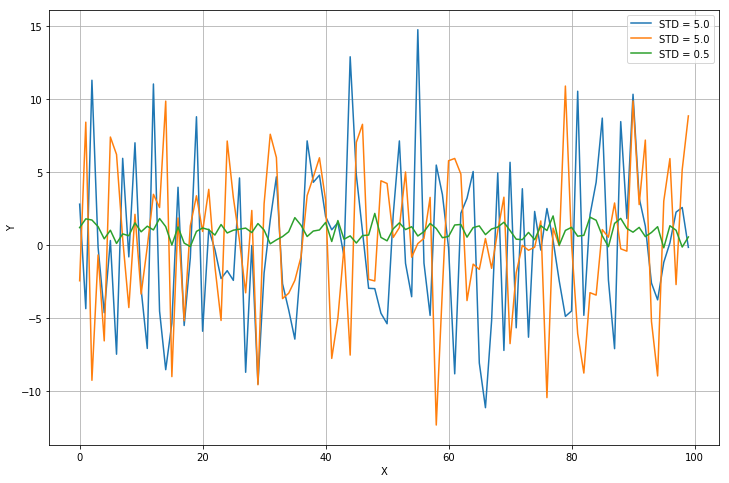

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.ndarray(shape=(100, 3))

X[:, 0] = np.random.normal(0.0, 5.0, size=100)
X[:, 1] = np.random.normal(0.5, 5.0, size=100)
X[:, 2] = np.random.normal(1.0, 0.5, size=100)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.plot(X[:, 0], label='STD = 5.0')
ax.plot(X[:, 1], label='STD = 5.0')
ax.plot(X[:, 2], label='STD = 0.5')

plt.legend()
plt.show()

In [16]:
print('Samples before variance thresholding')
print(X[0:3, :])

Samples before variance thresholding
[[ 2.79801889 -2.45588366  1.18894871]
 [-4.36774921  8.42290612  1.79156523]
 [11.29925992 -9.28278027  1.71107572]]


In [17]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=1.5)
X_t = vt.fit_transform(X)

# After the filter has removed the componenents
print('Samples after variance thresholding')
print(X_t[0:3, :])

Samples after variance thresholding
[[ 2.79801889 -2.45588366]
 [-4.36774921  8.42290612]
 [11.29925992 -9.28278027]]


#### Técnicas
- Selección de atributos
    - Filter: pre-procesado previo al algoritmo de aprendizaje
    - Wrapper: selección evaluando en el contexto del algoritmo de aprendizaje
- Análisis de Componentes Principales (Principal Component Analysis, PCA)
- Análisis de correlación

#### Análisis de Componentes Principales (PCA)

Procedimiento que intenta generar un nuevo sistema de coordenadas para representar los datos a partir de transformaciones lineales sobre las variables originales:
- Construcción de matriz de covarianza o de correlación
- Pandas provee una función para ello: `pandas.DataFrame.corr`

Cada eje ortogonal se escoge en orden de aporte de varianza del modelo creciente (el primer eje, la componente principal que más varianza aporta, etc.)
El número de componentes que se utilizarán es decisión del usuario, aunque se suele tomar como mínimo aquéllas que
representan un 80% de la varianza original 
- En muchos casos se exige llegar hasta alrededor del 95%

In [18]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)

X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)